In [2]:
# Class 8 - Lecture - More on Modelling

# July 16 - new deadline for A2 for MBAN 6110

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Plt
import matplotlib.pyplot as plt

In [6]:
# Read CSV file
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [7]:
# Bike Share for Washington DC
bikes.head()

# Season = is season for bike riding or not
# Holiday = 1 is a holiday
# Working Day
# Weather = 1 - categorical - severity
# Temp in Celsuis
# Atemp - feels like 
# Wind speed - speed of win
# Casual - people who are generally walking by and want
# Registered = number of ppl who have accounts, annual subscription
# Count = total of casual and regular users
# Hourly rental of bike rentals, at a given hour

# Influencing factor of bike rental, influence by humidity, weather, temperature

# Count - we are predicting the count rentals
# Make sure the downtown rental speed

# Casual renters - fun thing, tourists, occassion with friends/family, probably not on rush hour
# Registered - people who live in the city, such as commuters

# Probably rain or shine


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
# Convert datetime to datetime variable
bikes["datetime"] = pd.to_datetime(bikes["datetime"])

In [11]:
# Extraction - timing, hours + specific windows
# Monthly data, weekly data

bikes["hour"] = bikes["datetime"].apply(lambda x: x.hour)

In [13]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [36]:
def time_of_day(x):
    if x >=3 and x <= 9:
        return 'morning_commute'
    elif x >= 10 and x <= 14:
        return 'midday'
    elif x >= 15 and x <= 19:
        return 'evening_commute'
    elif x >= 20 and x <= 23:
        return 'after_hours'
    else:
        return 'late_night'

In [37]:
bikes["time_of_day"] = bikes["hour"].apply(time_of_day)

In [38]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,late_night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,late_night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,late_night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,morning_commute
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,morning_commute


## Hourly Analysis

<Axes: xlabel='time_of_day', ylabel='casual'>

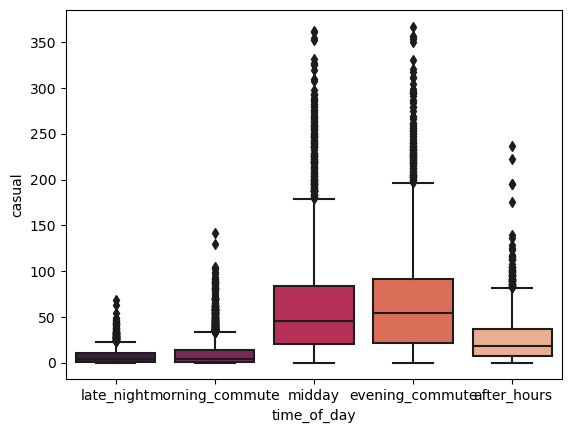

In [50]:
sns.boxplot(x = "time_of_day", y = "casual", data = bikes, palette="rocket")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'late_night'),
  Text(1, 0, 'morning_commute'),
  Text(2, 0, 'midday'),
  Text(3, 0, 'evening_commute'),
  Text(4, 0, 'after_hours')])

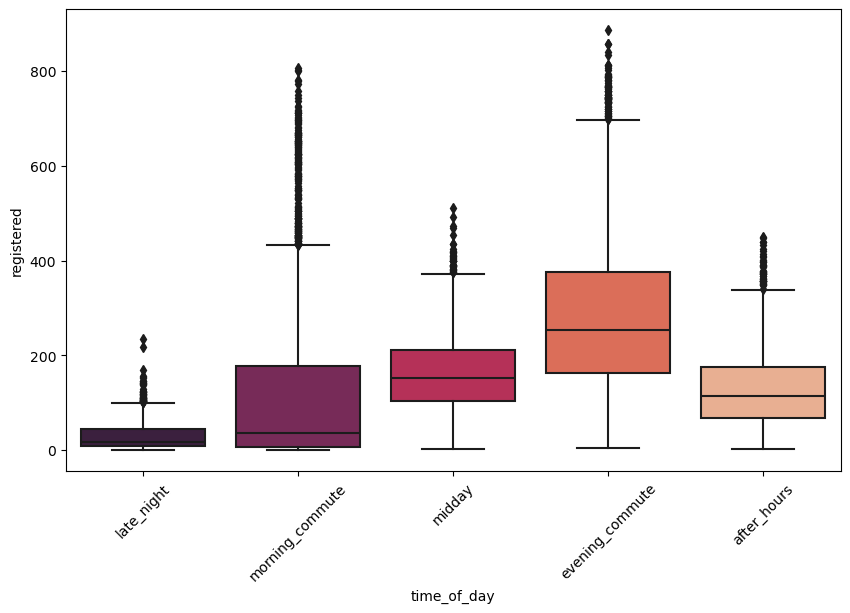

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "time_of_day", y = "registered", data = bikes, palette="rocket")
plt.xticks(rotation = 45)

<Axes: xlabel='workingday', ylabel='count'>

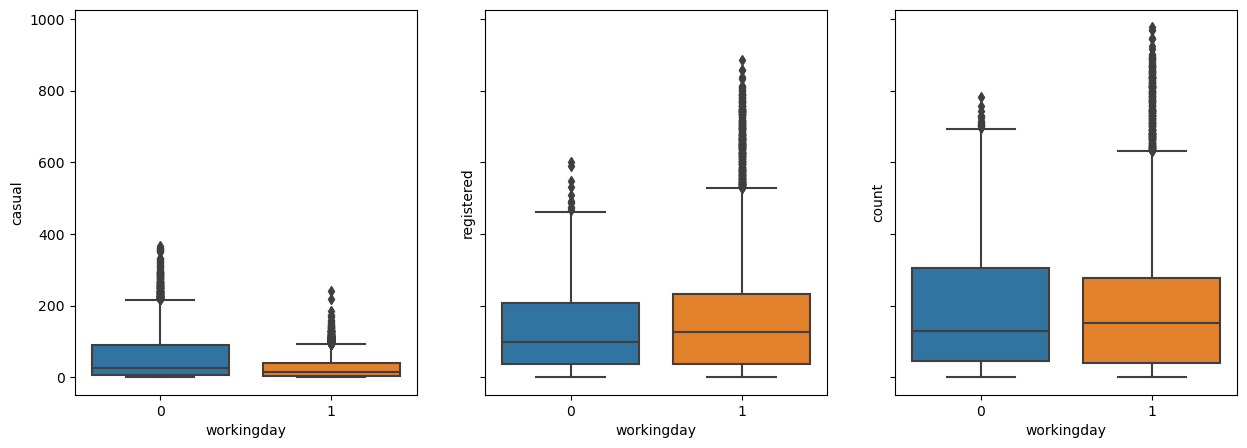

In [63]:
# Other variables
# Check each of the 3 - casual, registered, count, etc to see which one makes sense for linear regression
# season    holiday workingday  weather
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='workingday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='workingday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='workingday', y='count', data=bikes, ax=ax3)


# Fall, Spring, Summer popular - for Casual
# Registered - more consistent, commuters
# Better for registered


# Weather
# Season does not matter for registered users
# Weather seems to have an impact, i.e. take transit

# Season and Weather maybe have an influence

# Holiday - not much, pretty similar

# Workday
# Causal  - use it more when 0, for non-working day
# Workers - same (registered) but more outliers

In [64]:
bikes["weekday"] = bikes["datetime"].apply(lambda x: x.weekday())

<Axes: xlabel='weekday', ylabel='count'>

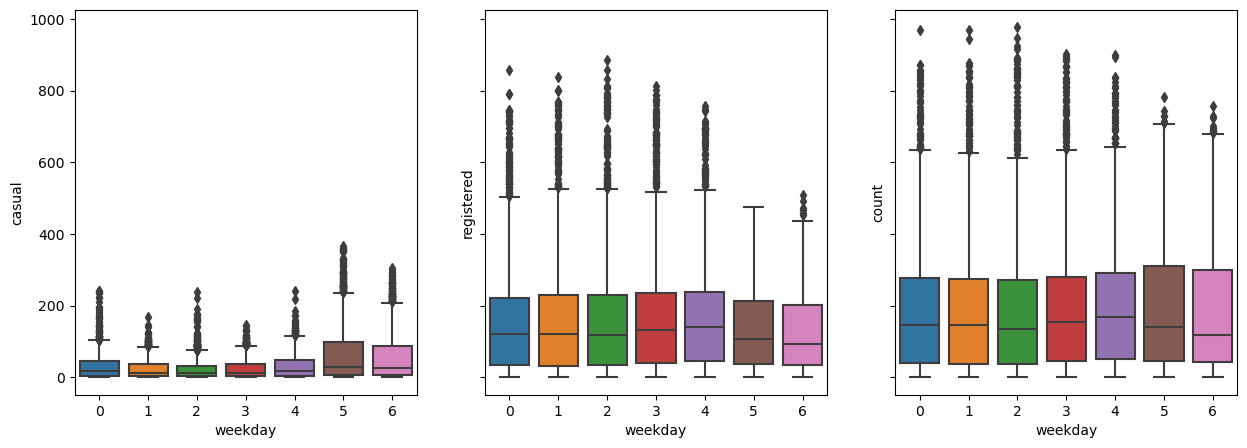

In [65]:
# Check each of the 3 - casual, registered, count, etc to see which one makes sense for linear regression
# season    holiday workingday  weather
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes, ax=ax3)

# 5 = Saturday, 6 = Sunday
# We see that casual, Saturday has more rentals, and Sunday has more rentals
# Registered = more consistent, but for casual, more variability for the median


In [94]:
# Roughly how many hourly, or more predictable dataset
# Aggregated on a daily basis - daily bike share data

# Make this:

bikes_daily = bikes.set_index("datetime")

In [95]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day,weekday
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,late_night,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,late_night,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,late_night,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,morning_commute,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,morning_commute,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,evening_commute,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,after_hours,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,after_hours,2


In [96]:
# resample D - daily
bikes_daily = bikes_daily.resample("D").agg({'season':'max', 'holiday': 'max', 'workingday': 'max', 'weather': 'max',
                              'temp': 'mean', 'atemp': 'mean', 'humidity': 'mean', 'windspeed': 'mean',
                              'casual': 'sum',
                              'registered': 'sum',
                              'count': 'sum',
                              'weekday': 'max'});

# Bike is rented for 30 mins
# May show up as two bikes being rented

In [97]:
# Resampled
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
datetime,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,3.0,14.110833,18.181250,80.583333,10.749871,331,654,985,5.0
2011-01-02,1.0,0.0,0.0,3.0,14.902609,17.686957,69.608696,16.652122,131,670,801,6.0
2011-01-03,1.0,0.0,1.0,1.0,8.050909,9.470227,43.727273,16.636709,120,1229,1349,0.0
2011-01-04,1.0,0.0,1.0,2.0,8.200000,10.606087,59.043478,10.739809,108,1454,1562,1.0
2011-01-05,1.0,0.0,1.0,1.0,9.305217,11.463478,43.695652,12.522300,82,1518,1600,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,2.0,13.290833,16.919167,65.041667,7.125450,767,4280,5047,5.0
2012-12-16,4.0,0.0,0.0,3.0,14.862500,18.496875,83.875000,6.749692,538,3248,3786,6.0
2012-12-17,4.0,0.0,1.0,3.0,16.126667,20.075000,90.708333,6.583308,212,4373,4585,0.0


<Axes: xlabel='weekday', ylabel='count'>

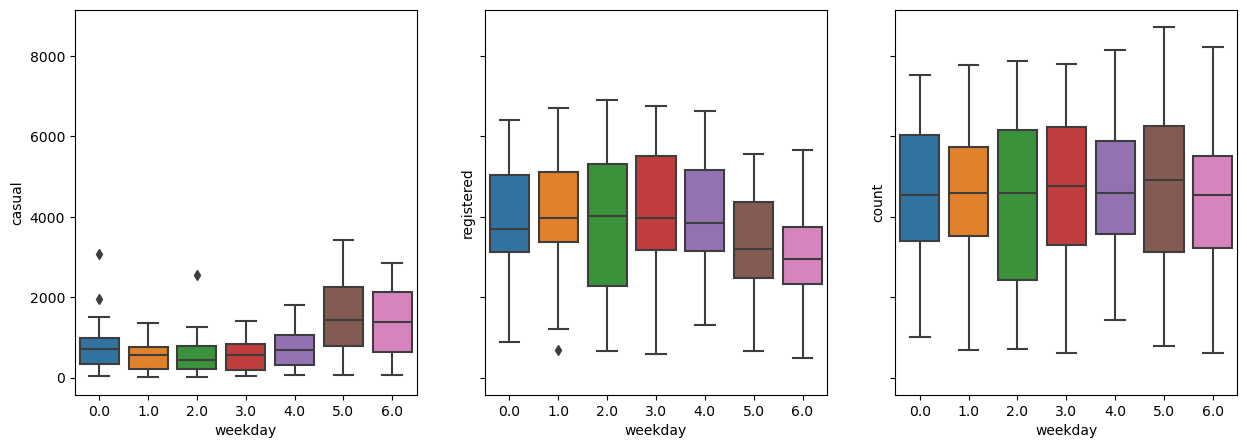

In [98]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes_daily, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes_daily, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes_daily, ax=ax3)

<Axes: xlabel='temp', ylabel='count'>

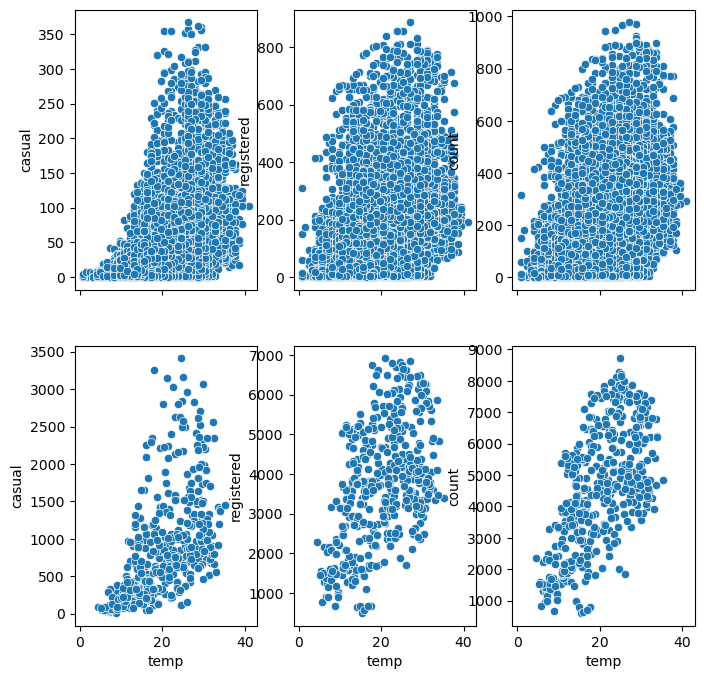

In [104]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', data=bikes, ax=ax1)
sns.scatterplot(x='temp', y='registered', data=bikes, ax=ax2)
sns.scatterplot(x='temp', y='count', data=bikes, ax=ax3)
sns.scatterplot(x='temp', y='casual', data=bikes_daily, ax=ax4)
sns.scatterplot(x='temp', y='registered', data=bikes_daily, ax=ax5)
sns.scatterplot(x='temp', y='count', data=bikes_daily, ax=ax6)

<Axes: xlabel='temp', ylabel='count'>

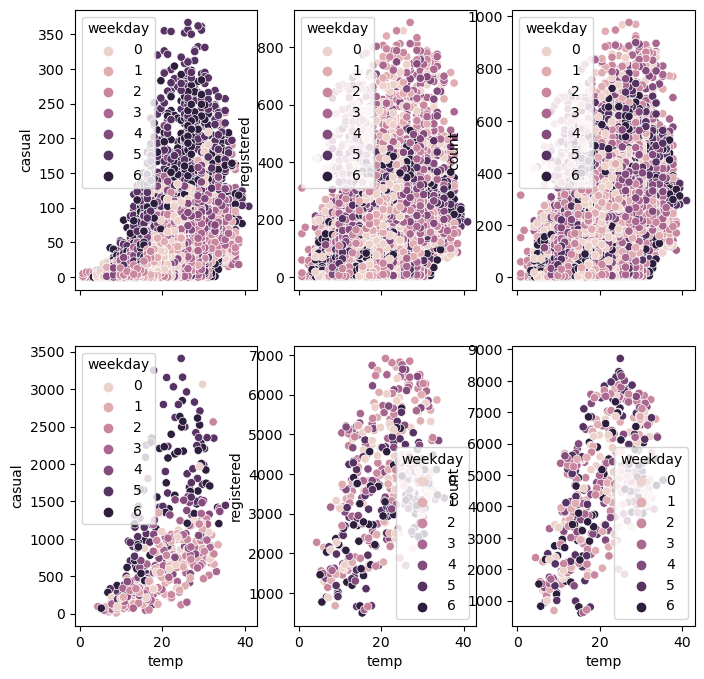

In [105]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', hue = "weekday", data=bikes, ax=ax1)
sns.scatterplot(x='temp', y='registered', hue = "weekday", data=bikes, ax=ax2)
sns.scatterplot(x='temp', y='count', hue = "weekday", data=bikes, ax=ax3)
sns.scatterplot(x='temp', y='casual', hue = "weekday", data=bikes_daily, ax=ax4)
sns.scatterplot(x='temp', y='registered', hue = "weekday", data=bikes_daily, ax=ax5)
sns.scatterplot(x='temp', y='count', hue = "weekday", data=bikes_daily, ax=ax6)

# If you looked without the hue for weekday for causal, you'd see the highest number of bike rental
# It's not just causal and temperature. Weekday can segment as well.